In [1]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_iris, load_digits, load_boston
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from collections import OrderedDict
import gc

In [2]:
rng = np.random.RandomState(31337)
boston = load_boston()
y = boston['target']
X = boston['data']

In [3]:
X = boston['data']
y = boston['target']
print X.shape
print y.shape
X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test = y[400:]

tempX = 400 * [-1] + y_test.shape[0] * [0]
tempX[:4]

(506, 13)
(506,)


[-1, -1, -1, -1]

In [4]:
def RMSE(y_true,y_pred):
    mse = np.sqrt(mean_squared_error(y_true, y_pred))
    print 'MSE: %2.3f' % mse
    return mse

# Don't have early stop option!!!!!!!!So didn't use so far..
## Semi-Automatic Hyperparameter Tuning, it can't predict. Only gives optimum parameter..
## Predict doesn't work, because when refit = False, it doesn't assign best estimator!!!
## Doesn't do 2 fold, this is what i want for Bimbo..

In [5]:
print("Boston Housing: regression")
boston = load_boston()
y = boston['target']
X = boston['data']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1729)


'''base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1
        
        
learning_rate=0.1
max_depth=3
missing=np.nan, learning_rate=0.02, subsample=0.9, colsample_bytree=0.85
'''

#in order depth= 10, subsample=1.0, min_child_weight = 5, col_sample_bytree = 0.2, eta = 0.1, 
#col_sample_bytree = 0.4 - 1
#gamma = 0.05,0.1 0.3, 0.5, 0.7, 1
#lambda = 0.01, 0.1, 1
#alpha = 0.01, 0.1, 1
#n_estimators is last..

#Start from 10 and play up down..
depth = [12,8]
subsample = [0.8,0.6]
min_child_weight = [3,7]
col_sample_bytree = [0.3,0.5,0.8,1]
#lambdaa = [0.01, 0.1, 1]
#alpha = [0.01, 0.1]
#Use this eta to find the optimum iteration
eta = [0.05]

defaultParams = {"max_depth":10, "subsample":1., "min_child_weight":5, "colsample_bytree":0.4, "missing":np.nan}

import numpy as np
from sklearn.cross_validation import PredefinedSplit
#ps = PredefinedSplit(test_fold=[-1, -1, -1, 0,0])
ps = PredefinedSplit(test_fold=tempX)

#ps = PredefinedSplit(test_fold=[0, 1, 2, 1])
#len(ps)



#xgb_model.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test, y_test)],
 #        verbose=10, early_stopping_rounds = 50)

cv_params = {'n_estimators': [200]}


optimized_Xgb = GridSearchCV(xgb.XGBRegressor(**defaultParams), 
    cv_params, cv = ps, n_jobs = -1,verbose=1,refit=False, scoring = make_scorer(RMSE, greater_is_better=False)) 

optimized_Xgb.fit(X,y)

#optimized_GBM.best_estimator_ = optimized_GBM.estimator

#print(optimized_GBM.best_score_)
#print(optimized_GBM.best_params_)


#predictions = optimized_GBM.predict(X_train)
#predictionsTest = optimized_GBM.predict(X_test)
#print( np.sqrt(mean_squared_error(y_train, predictions)))
#print( np.sqrt(mean_squared_error(y_test, predictionsTest)))

Boston Housing: regression
Fitting 1 folds for each of 1 candidates, totalling 1 fits
MSE: 5.585


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


GridSearchCV(cv=sklearn.cross_validation.PredefinedSplit(test_fold=[-1 -1 ...,  0  0]),
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200]}, pre_dispatch='2*n_jobs',
       refit=False, scoring=make_scorer(RMSE, greater_is_better=False),
       verbose=1)

## Pickle, Save Model..

In [12]:
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(xgb_model, open("best_boston.pkl", "wb"))
clf2 = pickle.load(open("best_boston.pkl", "rb"))
print(np.allclose(xgb_model.predict(X_train), clf2.predict(X_train)))

Pickling sklearn API models


XGBoostError: need to call fit beforehand

## Manuel Hyperparameter Tuning Davut 

Boston Housing: regression
[0]	validation_0-rmse:23.1009	validation_1-rmse:14.6234
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[1]	validation_0-rmse:21.0086	validation_1-rmse:12.6123
[2]	validation_0-rmse:19.1358	validation_1-rmse:11.3087
[3]	validation_0-rmse:17.4515	validation_1-rmse:10.0673
[4]	validation_0-rmse:15.8429	validation_1-rmse:8.91073
[5]	validation_0-rmse:14.3663	validation_1-rmse:7.99402
[6]	validation_0-rmse:13.1263	validation_1-rmse:6.84218
[7]	validation_0-rmse:12.0237	validation_1-rmse:6.22083
[8]	validation_0-rmse:11.019	validation_1-rmse:5.59899
[9]	validation_0-rmse:10.13	validation_1-rmse:5.06344
[10]	validation_0-rmse:9.26016	validation_1-rmse:4.56539
[11]	validation_0-rmse:8.51636	validation_1-rmse:4.21592
[12]	validation_0-rmse:7.77885	validation_1-rmse:3.95813
[13]	validation_0-rmse:7.13544	validation_1-rmse:3.70216
[14]	validation_0-rmse:6.5436

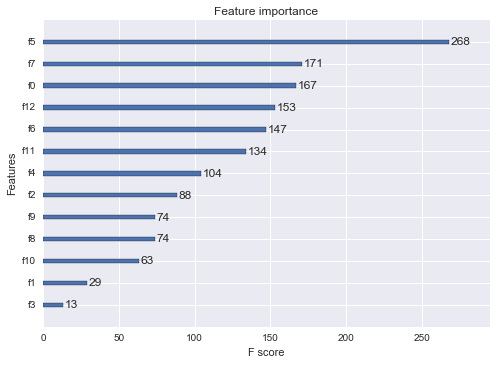

In [6]:
print("Boston Housing: regression")
#y = boston['target']
#X = boston['data']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1729)


'''base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1
        
        
learning_rate=0.1
max_depth=3
missing=np.nan, learning_rate=0.02, subsample=0.9, colsample_bytree=0.85
'''

#in order depth= 10, subsample=1.0, min_child_weight = 5, col_sample_bytree = 0.2, eta = 0.1, 

#col_sample_bytree = 0.4 - 1
#gamma = 0.05,0.1 0.3, 0.5, 0.7, 1
#lambda = 0.01, 0.1, 1
#alpha = 0.01, 0.1, 1
#n_estimators is last..


defaultParams = {"max_depth":10, "subsample":1., "min_child_weight":5, "colsample_bytree":0.4, "missing":np.nan
                ,"n_estimators":300}
xgb_model = xgb.XGBRegressor(**defaultParams) 


xgb_model.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test, y_test)],
         verbose=1, early_stopping_rounds = 30)


predictions = xgb_model.predict(X_train,ntree_limit  = xgb_model.best_iteration+1)
predictionsTest = xgb_model.predict(X_test,ntree_limit  = xgb_model.best_iteration+1)

print "trainResult: ", np.sqrt(mean_squared_error(y_train, predictions))
print "testResult: ", np.sqrt(mean_squared_error(y_test, predictionsTest))
print "Best Iteration: ", xgb_model.best_iteration
print "Best Score: ", xgb_model.best_score
print xgb.plot_importance(xgb_model)

## Automatic XGBoost

In [7]:
def GiveBestParameterWithoutCV(defaultParams, testParams, X_train, X_test, Y_train, Y_test, fitParams):
    xgb_model = xgb.XGBRegressor(**defaultParams) 
    
    minRmse = 10000
    minRmseParameter = 10000
    bestIteration = 1000
        
    for key,values in testParams:
        minRmseParameter = xgb_model.get_xgb_params()[key]
        
        for value in values:
            
            xgb_model.set_params(**{key:value})
            xgb_model.fit(X_train,Y_train, eval_set=[(X_train, Y_train),(X_test, Y_test)],
                  **fitParams)
            if xgb_model.best_score < minRmse:
                minRmse = xgb_model.best_score
                minRmseParameter = value
                bestIteration = xgb_model.best_iteration
                
        xgb_model.set_params(**{key:minRmseParameter})
        print "Parameters are finished for {}. Best Iteration is {}".format(key, bestIteration)
        print "Minimum Rmse : {}, optimum parameter is {} between {}".format(minRmse, minRmseParameter, values)
    gc.collect()

In [8]:
defaultParams = {"max_depth":10, "subsample":1., "min_child_weight":5, "colsample_bytree":0.4, "missing":np.nan
                ,"n_estimators":300, "learning_rate":0.1}
testParams = [("max_depth",[12,8,6,14]), ("subsample",[0.9,0.8,0.6]), ("min_child_weight",[1,3,7]),
                  ("colsample_bytree",[0.3,0.5,0.6, 0.8,1]), ("learning_rate",[0.05])]
fitParams = {"verbose":10, "early_stopping_rounds": 50}

GiveBestParameterWithoutCV(defaultParams,testParams, X_train, X_test, y_train, y_test, fitParams )

[0]	validation_0-rmse:23.1009	validation_1-rmse:14.6234
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[10]	validation_0-rmse:9.25949	validation_1-rmse:4.56019
[20]	validation_0-rmse:4.13939	validation_1-rmse:3.47237
[30]	validation_0-rmse:2.25765	validation_1-rmse:4.62288
[40]	validation_0-rmse:1.48033	validation_1-rmse:5.12618
[50]	validation_0-rmse:1.05455	validation_1-rmse:5.39472
[60]	validation_0-rmse:0.818546	validation_1-rmse:5.48539
Stopping. Best iteration:
[17]	validation_0-rmse:5.13125	validation_1-rmse:3.37505

[0]	validation_0-rmse:23.1009	validation_1-rmse:14.6234
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[10]	validation_0-rmse:9.26368	validation_1-rmse:4.569
[20]	validation_0-rmse:4.15646	validation_1-rmse:3.53157
[30]	validation_0-rmse:2.3231	v

In [ ]:


#Start from 10 and play up down..
max_depth = [12,8,6,14]
subsample = [0.8,0.6]
min_child_weight = [3,7]
colsample_bytree = [0.3,0.5,0.8,1]
#lambdaa = [0.01, 0.1, 1]
#alpha = [0.01, 0.1]
#Use this eta to find the optimum iteration
eta = [0.05]

xgb_model.fit(X_train,y_train,eval_set=[(X_train, y_train),(X_test, y_test)],
         verbose=1, early_stopping_rounds = 30)

In [ ]:
3.764692

In [1]:
xgb_model

NameError: name 'xgb_model' is not defined

In [60]:
xgb_model.set_params(**{"min_child_weight":4})

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=4, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0)

In [74]:
xgb_model.get_xgb_params()["min_child_weight"]

4

In [81]:
a = OrderedDict({"max_depth":10, "subsample":1., "min_child_weight":5, "colsample_bytree":0.4, "missing":np.nan
                ,"n_estimators":300, "learning_rate":0.1})

In [82]:
for i in a:
    print a

OrderedDict([('colsample_bytree', 0.4), ('missing', nan), ('learning_rate', 0.1), ('min_child_weight', 5), ('n_estimators', 300), ('subsample', 1.0), ('max_depth', 10)])
OrderedDict([('colsample_bytree', 0.4), ('missing', nan), ('learning_rate', 0.1), ('min_child_weight', 5), ('n_estimators', 300), ('subsample', 1.0), ('max_depth', 10)])
OrderedDict([('colsample_bytree', 0.4), ('missing', nan), ('learning_rate', 0.1), ('min_child_weight', 5), ('n_estimators', 300), ('subsample', 1.0), ('max_depth', 10)])
OrderedDict([('colsample_bytree', 0.4), ('missing', nan), ('learning_rate', 0.1), ('min_child_weight', 5), ('n_estimators', 300), ('subsample', 1.0), ('max_depth', 10)])
OrderedDict([('colsample_bytree', 0.4), ('missing', nan), ('learning_rate', 0.1), ('min_child_weight', 5), ('n_estimators', 300), ('subsample', 1.0), ('max_depth', 10)])
OrderedDict([('colsample_bytree', 0.4), ('missing', nan), ('learning_rate', 0.1), ('min_child_weight', 5), ('n_estimators', 300), ('subsample', 1.0), 

In [102]:
qwe = [("max_depth",[12,8]), ("subsample",[0.8,0.6]), ("min_child_weight",[3,7]),
                  ("colsample_bytree",[0.3,0.5,0.8,1]), ("learning_rate",[0.05])]

In [101]:
for i in qwe:
    print i

('max_depth', [12, 8])
('subsample', [0.8, 0.6])
('min_child_weight', [3, 7])
('colsample_bytree', [0.3, 0.5, 0.8, 1])
('learning_rate', [0.05])
